# Basic MLMC runs and plots

In [3]:
import numpy as np 


def non_hom_test(x, y):
    return np.sin(x)*np.sin(y)


def test_phi(x, y):
    return 10*np.sin(np.pi*x)*np.sin(np.pi*y)


def test_bound(x, y):
    return 0 #np.cos(np.pi*x)*np.cos(np.pi*y)


def test_rhs(x, y):
    return np.pi**2 * (np.sin(np.pi * x)*np.sin(np.pi * y))

def test_cos(x, y):
    return np.cos(np.pi*x)*np.cos(np.pi*y)

def test_cos_rhs(x, y):
    return (np.pi**2) * np.cos(np.pi*x)*np.cos(np.pi*y)


In [2]:
from mlmc import mlmc
from tqdm.notebook import tqdm


def check_mlmc(N, epsilon, dt0, x=.5, y=.5):
    errs = np.zeros(N)
    expectation = np.zeros(N)
    cost = np.zeros(N)
    max_level = np.zeros(N)
    for i in tqdm(range(N)):
        expectation[i], cost[i], max_level[i], _ = mlmc(x, y, 
                                                     test_cos, test_cos_rhs, 
                                                     dt0, epsilon)
        errs[i] =  abs(test_cos(x, y) - expectation[i])
        
    return errs, cost, max_level

  0%|          | 0/50 [00:00<?, ?it/s]

average error:  0.03593900039741751
maximal error:  0.12595157658375444
minimal error:  0.0013054935862111634
std of error:  0.026342487018793992


  0%|          | 0/50 [00:00<?, ?it/s]

average error:  0.032766552803979346
maximal error:  0.07658372708915871
minimal error:  0.0003241714015175248
std of error:  0.02236568547335027


  0%|          | 0/50 [00:00<?, ?it/s]

average error:  0.020151927622856648
maximal error:  0.06263441244691863
minimal error:  0.00041006491013646524
std of error:  0.01618960856659715


  0%|          | 0/50 [00:00<?, ?it/s]

average error:  0.010898601350251341
maximal error:  0.03810781212514073
minimal error:  0.000327177297000134
std of error:  0.009110497707871612


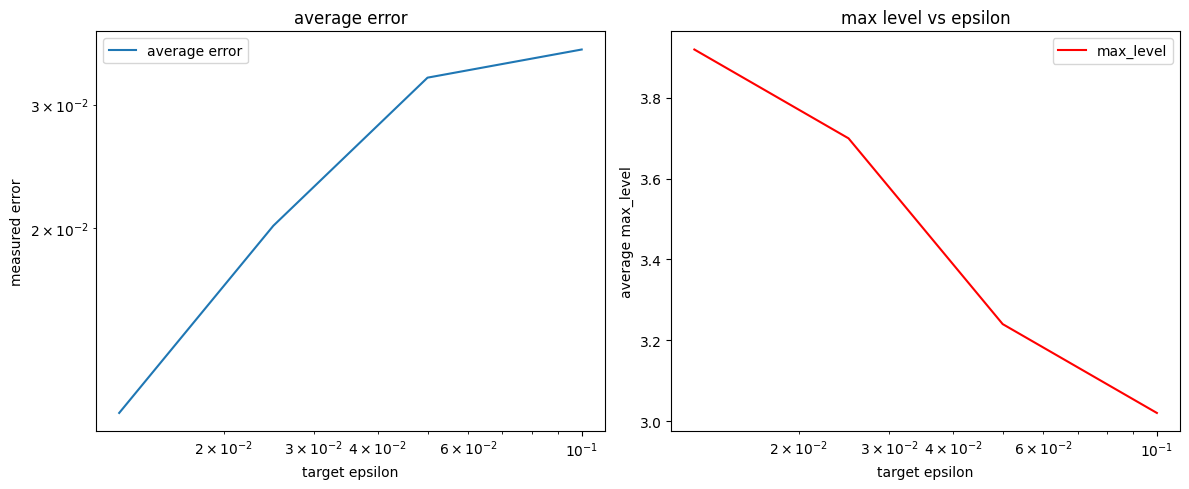

In [3]:
import matplotlib.pyplot as plt
N = 50
x = y = .5
dt0 = .01
epsilons = [.1, .05, .025, .0125]
mean_errs = []
mean_levels = []
mean_costs = []

for eps in epsilons:
    errs, costs, levels = check_mlmc(N, eps, dt0)
    print("average error: ", errs.mean())
    print("maximal error: ", errs.max())
    print("minimal error: ", errs.min())    
    print("std of error: ", errs.std())
    mean_errs.append(errs.mean())
    mean_levels.append(levels.mean())

# Create subplots with 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Log-Log plot
axes[0].loglog(epsilons, mean_errs, label="average error")
axes[0].set_title("average error")
axes[0].set_xlabel("target epsilon")
axes[0].set_ylabel("measured error")
axes[0].legend()

# Linear plot
axes[1].plot(epsilons, mean_levels, label="max_level", color="r")
axes[1].set_title("max level vs epsilon")
axes[1].set_xlabel("target epsilon")
axes[1].set_ylabel("average max_level")
axes[1].set_xscale("log")
axes[1].legend()

# Show plots
plt.tight_layout()  # Adjust spacing
plt.show()

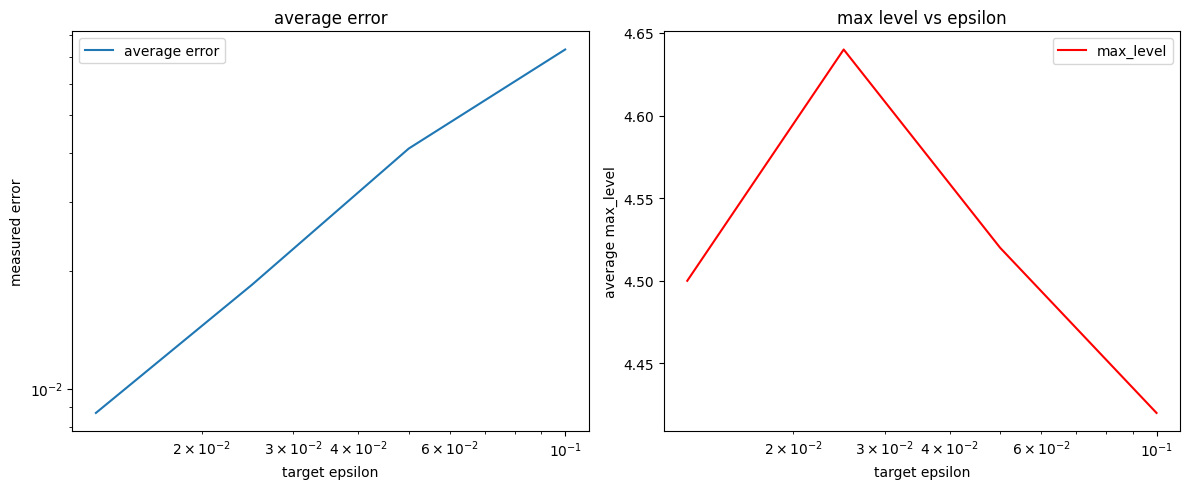

In [4]:
# Create subplots with 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Log-Log plot
axes[0].loglog(epsilons, mean_errs, label="average error")
axes[0].set_title("average error")
axes[0].set_xlabel("target epsilon")
axes[0].set_ylabel("measured error")
axes[0].legend()

# Linear plot
axes[1].plot(epsilons, mean_levels, label="max_level", color="r")
axes[1].set_title("max level vs epsilon")
axes[1].set_xlabel("target epsilon")
axes[1].set_ylabel("average max_level")
axes[1].set_xscale("log")
axes[1].legend()

# Show plots
plt.tight_layout()  # Adjust spacing
plt.show()

In [6]:
import matplotlib.pyplot as plt
N = 50
x = y = .5
dt0s = [.1/(2**i) for i in range(3, 9)]
epsilon = .025
mean_errs = []
mean_levels = []
mean_costs = []

for dt0 in dt0s:
    errs, costs, levels = check_mlmc(N, epsilon, dt0)
    print("average error: ", errs.mean())
    print("maximal error: ", errs.max())
    print("minimal error: ", errs.min())    
    print("std of error: ", errs.std())
    mean_errs.append(errs.mean())
    mean_levels.append(levels.mean())

# Create subplots with 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Log-Log plot
axes[0].loglog(dt0s, mean_errs, label="average error", base=2)
axes[0].set_title("average error")
axes[0].set_xlabel("dt at 0th level")
axes[0].set_ylabel("measured error")
axes[0].legend()

# Linear plot
axes[1].plot(dt0s, mean_levels, label="average max_level", color="r")
axes[1].set_title("max level vs epsilon")
axes[1].set_xlabel("dt at 0th level")
axes[1].set_ylabel("average max_level")
axes[1].set_xscale("log", base=2)

axes[1].legend()

# Show plots
plt.tight_layout()  # Adjust spacing
plt.show()

  0%|          | 0/50 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [5]:
# benchmark how long it takes to generate a single sample
from random_walk import feynman_kac_correlated
x = .5
y = .5
dt_fine = .000001
level = 1

%timeit feynman_kac_correlated((x, y, test_bound, test_rhs, dt_fine, level))

7.84 ms ± 358 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
y = np.log2(np.abs(np.array([-6.05463385e-02, -3.70904309e-02, -2.06358718e-02, 
                    -2.25945456e-02, -1.50705625e-02, -9.64745850e-04])))
x = np.linspace(1, 6, 6)

a, b = np.polyfit(x, y, 1)
a2, b2, = np.polyfit(x[:-1], y[:-1], 1)

<function matplotlib.pyplot.show(close=None, block=None)>

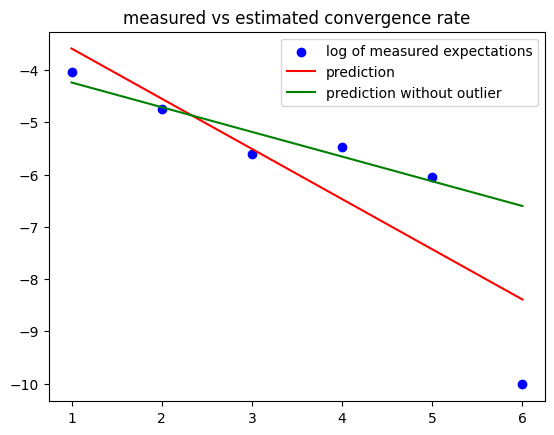

In [7]:
plt.scatter(x, y, label="log of measured expectations", color="b")
plt.plot(x, a*x + b, label="prediction", color="r")
plt.plot(x, a2*x + b2, label="prediction without outlier", color="g")
plt.title("measured vs estimated convergence rate")
plt.legend()
plt.show

## Plot distribution of feynman_kac_correlated

In [5]:

from random_walk import feynman_kac_correlated
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from test_functions import gaussian, gaussian_rhs, sq_cos, sq_cos_rhs

N_samples = 10000
dt = .01
level = 1
dt_ratio = 2
x = .5
y = .5
args = (x, y, test_bound, test_rhs, dt, level, dt_ratio)

integrals = np.zeros(N_samples)
work = np.zeros(N_samples)
for i in tqdm(range(N_samples)):
    integrals[i], work[i], _ = feynman_kac_correlated(args)

  0%|          | 0/10000 [00:00<?, ?it/s]

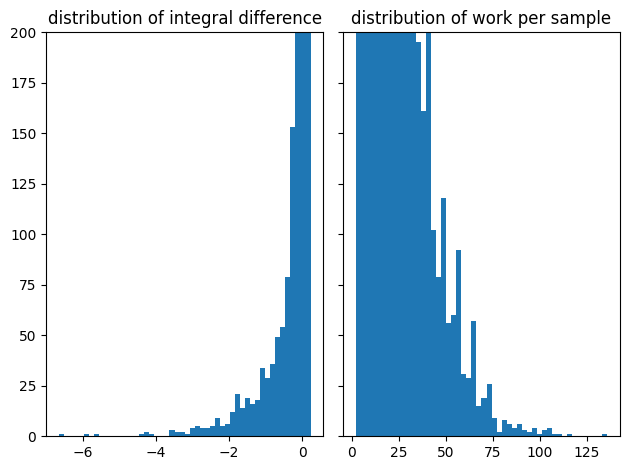

In [7]:
n_bins=50
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(integrals, bins=n_bins)
#axs[0].set_xlim(-4, -.01)
axs[0].set_ylim(0, 200)
axs[0].set_title("distribution of integral difference")

axs[1].hist(work, bins=n_bins)
axs[1].set_title("distribution of work per sample")

plt.show()

In [5]:
%%timeit
mlmc(.5, .5, test_bound, test_rhs, .01, .01)

The slowest run took 7.56 times longer than the fastest. This could mean that an intermediate result is being cached.
46.8 s ± 27.3 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%%timeit
mlmc(.7, .7, test_bound, test_rhs, .01, .01)

23.1 s ± 7.79 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
%%timeit
mlmc(.5, .5, test_cos, test_cos, .01, .01)

2.12 s ± 995 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
%%timeit
mlmc(.2, .2, test_cos, test_cos, .01, .01)

The slowest run took 12.45 times longer than the fastest. This could mean that an intermediate result is being cached.
7.38 s ± 3.75 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
